<a href="https://colab.research.google.com/github/hardik-sh/Stock-Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import math
import pandas_datareader.data as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('bmh')
import yfinance as yfin
yfin.pdr_override()
df = web.DataReader('SBIN.NS',data_source="google",start='2012-01-01',end='2020-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,162.899994,163.600006,161.139999,162.764999,147.880875,14464990
2012-01-03,164.399994,171.000000,164.300003,170.565002,154.967636,21341020
2012-01-04,171.199997,171.389999,167.520004,169.604996,154.095413,22241630
2012-01-05,169.600006,171.854996,168.005005,169.244995,153.768341,21344840
2012-01-06,167.500000,170.759995,165.804993,167.274994,151.978455,21137420
...,...,...,...,...,...,...
2019-12-24,333.200012,334.200012,329.200012,331.450012,328.417877,21747782
2019-12-26,333.000000,333.450012,328.100006,329.850006,326.832520,24616942
2019-12-27,333.399994,338.350006,333.000000,337.250000,334.164825,33477173


In [ ]:
df.shape

(1965, 6)

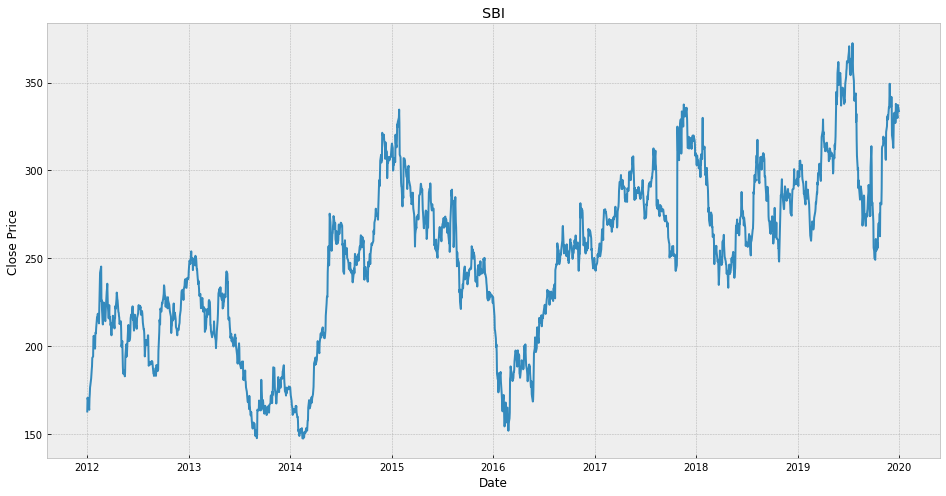

In [ ]:
plt.figure(figsize=(16,8))
plt.title('SBI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df=df.filter(['Close'])
df =df.dropna()
dataset = df.values
df.head(4)

,Close
Date,
2012-01-02,162.764999
2012-01-03,170.565002
2012-01-04,169.604996
2012-01-05,169.244995


In [ ]:
f_d = 250
df['Prediction']=df['Close'].shift(-f_d)
df.head(4)

,Close,Prediction
Date,,
2012-01-02,162.764999,249.335007
2012-01-03,170.565002,252.279999
2012-01-04,169.604996,253.910004
2012-01-05,169.244995,249.104996


In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-f_d]
print(X)

[[162.76499939]
 [170.56500244]
 [169.60499573]
 ...
 [289.20001221]
 [289.5       ]
 [292.75      ]]


In [ ]:
y = np.array(df['Prediction'])[:-f_d]
print(y)

[249.33500671 252.27999878 253.91000366 ... 337.25       334.3999939
 333.75      ]


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[0.06845449],
       [0.10311501],
       [0.09884907],
       ...,
       [0.84380557],
       [0.83114113],
       [0.82825278]])

In [ ]:
training_data_len =math.ceil(len(dataset)*.8)
training_data_len


1572

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train =[]
y_train =[]
for i in range(250,len(train_data)):
  x_train.append(train_data[i-250:i,0])
  y_train.append(train_data[i,0])
  if i<= 251:
    print(x_train)
    print(y_train)
    print()

[array([0.06845449, 0.10311501, 0.09884907, 0.09724936, 0.08849535,
       0.07272043, 0.10175966, 0.11258002, 0.12922148, 0.13442055,
       0.15232847, 0.16459294, 0.17408018, 0.18250086, 0.20407485,
       0.20747424, 0.25204409, 0.25968719, 0.2519552 , 0.22735956,
       0.2612869 , 0.26841895, 0.26617488, 0.27975028, 0.30619001,
       0.30194632, 0.31289991, 0.31567719, 0.31030041, 0.29134822,
       0.32285372, 0.34529419, 0.38959743, 0.4192366 , 0.43496711,
       0.34722717, 0.34967119, 0.3252755 , 0.28850429, 0.33667349,
       0.34391667, 0.33111892, 0.34353893, 0.3121445 , 0.29961342,
       0.2968139 , 0.33451831, 0.37202277, 0.37944366, 0.39157482,
       0.36691252, 0.33518483, 0.30392377, 0.31716585, 0.33738449,
       0.30527906, 0.30801193, 0.28610468, 0.29130374, 0.26912995,
       0.26117577, 0.27672856, 0.2918592 , 0.31058926, 0.3061456 ,
       0.27855048, 0.30110201, 0.3043681 , 0.33502936, 0.32825274,
       0.35171523, 0.36913435, 0.36355761, 0.3534705 , 0.3496

In [ ]:
x_train,y_train =np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1322, 250, 1)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import LSTM

In [ ]:
model =Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, batch_size=10,epochs=4)


Epoch 1/4
133/133 [==============================] - 5s 17ms/step - loss: 0.0298 - accuracy: 7.9272e-04
Epoch 2/4
133/133 [==============================] - 2s 15ms/step - loss: 0.0022 - accuracy: 1.5357e-04
Epoch 3/4
133/133 [==============================] - 2s 15ms/step - loss: 0.0020 - accuracy: 1.0095e-04
Epoch 4/4
133/133 [==============================] - 2s 15ms/step - loss: 0.0016 - accuracy: 6.2140e-04


In [ ]:
test_data = scaled_data[training_data_len -250 :,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(250, len(test_data)):
  x_test.append(test_data[i-250:i,0])


In [ ]:
x_test = np.array(x_test)


In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)


[[244.77087]
 [245.24542]
 [247.78442]
 [251.8198 ]
 [255.94072]
 [260.3811 ]
 [263.25055]
 [265.40906]
 [267.1752 ]
 [268.0098 ]
 [267.6943 ]
 [266.8898 ]
 [266.83673]
 [266.99115]
 [267.72992]
 [268.78116]
 [271.16437]
 [274.55667]
 [277.2352 ]
 [278.49524]
 [278.80032]
 [277.88538]
 [276.57434]
 [274.47723]
 [272.9398 ]
 [271.124  ]
 [269.31555]
 [266.92178]
 [263.93237]
 [261.42355]
 [259.38568]
 [257.6936 ]
 [256.4422 ]
 [255.4723 ]
 [254.92801]
 [255.32143]
 [256.45984]
 [257.19937]
 [258.24725]
 [258.57047]
 [257.65674]
 [257.33188]
 [257.31522]
 [257.5578 ]
 [258.0935 ]
 [259.40637]
 [260.98874]
 [263.24963]
 [267.85477]
 [272.80627]
 [278.9544 ]
 [284.20685]
 [288.5813 ]
 [291.64572]
 [294.38254]
 [297.84967]
 [300.32175]
 [302.69284]
 [305.9109 ]
 [306.8771 ]
 [305.1073 ]
 [302.38672]
 [299.09244]
 [297.39584]
 [297.42505]
 [298.17444]
 [298.54333]
 [298.46466]
 [299.39   ]
 [300.166  ]
 [301.51385]
 [302.73526]
 [303.9159 ]
 [304.38437]
 [302.90656]
 [300.80734]
 [298.6092 ]

In [ ]:
def stats(yTrue,yPred):
  accuracy=0
  for i in range(len(yTrue)):
    if(yTrue[i]-yPred[i]<20 and yTrue[i]-yPred[i]>-20):
      accuracy=accuracy+1

  accuracy=accuracy/(len(yTrue))

  return accuracy

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

,Close,Prediction,Predictions
Date,,,
2018-05-22,253.899994,353.549988,244.770874
2018-05-23,263.200012,352.500000,245.245422
2018-05-24,268.500000,355.450012,247.784424
2018-05-25,266.950012,352.399994,251.819794
2018-05-28,272.049988,336.899994,255.940720
...,...,...,...
2019-12-24,331.450012,NaN,326.282379
2019-12-26,329.850006,NaN,327.334503
2019-12-27,337.250000,NaN,327.621368


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


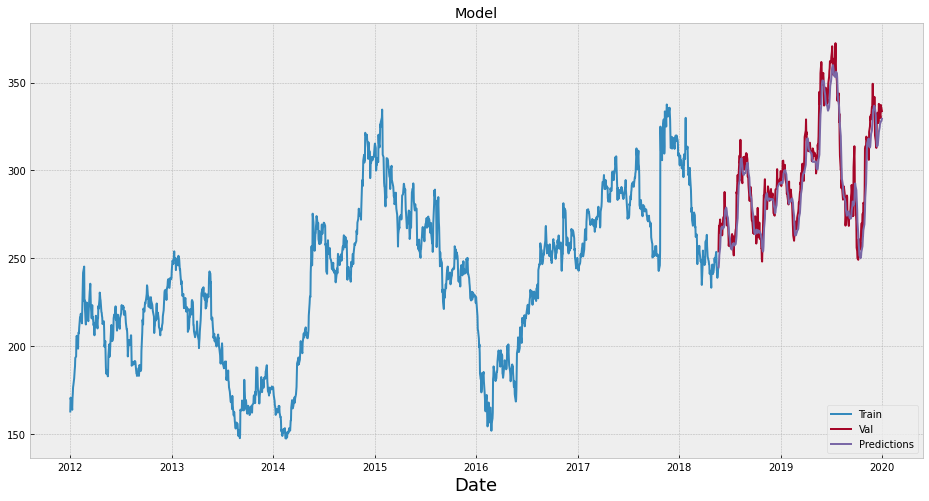

0.9516539440203562

In [ ]:
#LSTM
train = df[:training_data_len]
valid =  df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()
stats(valid['Close'],valid['Predictions'])

In [ ]:
valid


,Close,Prediction,Predictions
Date,,,
2018-05-22,253.899994,353.549988,244.770874
2018-05-23,263.200012,352.500000,245.245422
2018-05-24,268.500000,355.450012,247.784424
2018-05-25,266.950012,352.399994,251.819794
2018-05-28,272.049988,336.899994,255.940720
...,...,...,...
2019-12-24,331.450012,NaN,326.282379
2019-12-26,329.850006,NaN,327.334503
2019-12-27,337.250000,NaN,327.621368


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)


In [ ]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr= LinearRegression().fit(x_train,y_train)


In [ ]:
x_train.shape


(1200, 1)

In [ ]:
x_f = df.drop(['Prediction'],1)[:-f_d]
x_f=x_f.tail(f_d)
x_f=np.array(x_f)
x_f


array([[313.29998779],
       [314.        ],
       [312.25      ],
       [318.8999939 ],
       [319.79998779],
       [317.5       ],
       [316.75      ],
       [319.8500061 ],
       [317.1499939 ],
       [314.8500061 ],
       [308.3999939 ],
       [309.8999939 ],
       [307.1000061 ],
       [303.25      ],
       [302.8500061 ],
       [308.5       ],
       [306.3500061 ],
       [305.79998779],
       [304.29998779],
       [301.1000061 ],
       [302.20001221],
       [302.25      ],
       [302.6000061 ],
       [296.1499939 ],
       [307.1000061 ],
       [303.25      ],
       [309.25      ],
       [306.5       ],
       [318.1000061 ],
       [329.8999939 ],
       [313.1499939 ],
       [312.1000061 ],
       [313.54998779],
       [313.25      ],
       [306.04998779],
       [297.3500061 ],
       [298.04998779],
       [291.75      ],
       [292.79998779],
       [301.3999939 ],
       [296.3999939 ],
       [288.75      ],
       [276.20001221],
       [278

In [ ]:
tree_p =tree.predict(x_f)
print(tree_p)
print()
lr_p=lr.predict(x_f)
print(lr_p)


[300.70001221 209.55000305 291.8999939  293.04998779 294.1499939
 268.54998779 294.79998779 295.42500305 299.6000061  293.8999939
 291.1000061  297.6499939  248.06249619 288.04998779 305.29998779
 296.19999695 244.6000061  300.3999939  228.8999939  267.1000061
 294.95001221 294.95001221 183.3500061  290.25       248.06249619
 288.04998779 285.3999939  281.6000061  280.6000061  287.45001221
 293.6499939  284.3999939  274.20001221 284.6499939  289.04998779
 274.0249939  286.         280.5        333.75       267.1000061
 268.45001221 258.8500061  262.8999939  267.70001221 273.3500061
 293.7166748  271.375      329.79998779 314.44999695 269.04998779
 272.95001221 276.45001221 278.1000061  262.5        281.20001221
 287.3500061  277.8500061  264.59999593 254.75       298.3999939
 298.95001221 315.75       303.79998779 256.79998779 248.94999695
 303.5        314.0249939  319.         322.75       320.55000305
 320.5        321.79998779 314.7749939  258.8999939  314.75
 282.84999847 314.8999

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


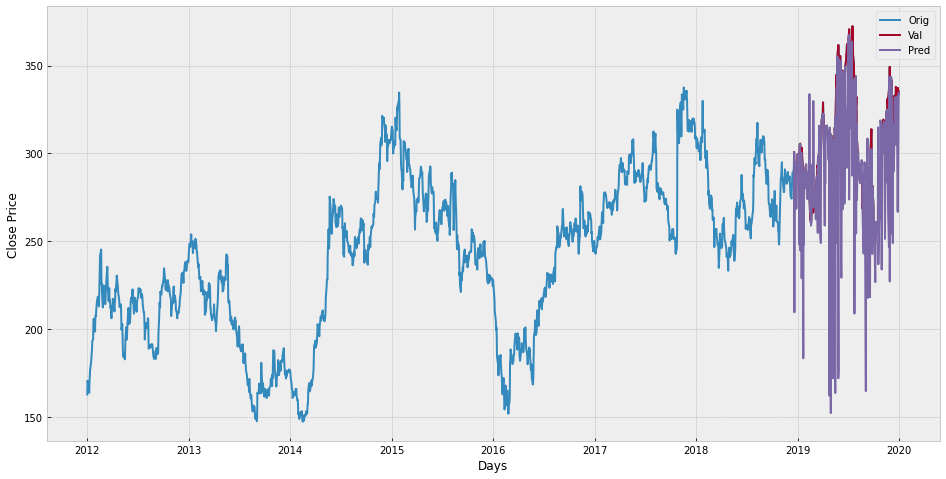

0.656

In [ ]:
#Decision Tree
pr =tree_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()
stats(valid['Close'],valid['Predictions'])

In [ ]:
valid

,Close,Prediction,Predictions
Date,,,
2018-12-19,300.700012,NaN,259.322603
2018-12-20,294.049988,NaN,259.355945
2018-12-21,291.899994,NaN,259.272592
2018-12-24,293.049988,NaN,259.589332
2018-12-26,294.149994,NaN,259.632198
...,...,...,...
2019-12-24,331.450012,NaN,257.986583
2019-12-26,329.850006,NaN,258.165195
2019-12-27,337.250000,NaN,258.174722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


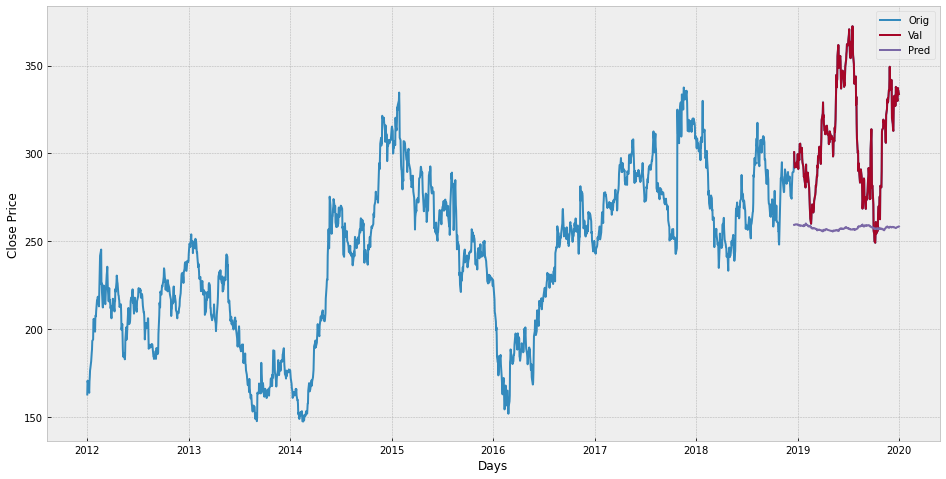

0.168

In [ ]:
#Linear Regression
pr =lr_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()
stats(valid['Close'],valid['Predictions'])